# Stats about https://ctftime.org

In [1]:
import datetime
datetime.datetime.now()

datetime.datetime(2022, 4, 28, 21, 43, 19, 844394)

## Top rated CTFs

In [2]:
!pip install lxml

In [3]:
!pip install html5lib

In [4]:
import pandas as pd

In [5]:
import requests

In [6]:
ff_header = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:99.0) Gecko/20100101 Firefox/99.0'}

In [7]:
r = requests.get(
    'https://ctftime.org/ctfs',
    headers=ff_header)

In [8]:
import bs4

In [9]:
tree = bs4.BeautifulSoup(markup=r.text)

In [10]:
tiles = tree.find_all('li', attrs={'class': "span4 ctf-tile"})

In [11]:
tile = tiles[0]

In [12]:
tile.find('p').text

'\nOfficial URL\nTotal events: 18\nAvg weight: 39.79'

In [13]:
data = []
for tile in tiles:
    title = tile.find('a').text

    *_, events, avg_weight = tile.find('p').text.strip().splitlines()
    # print(title, avg_weight, events)

    data.append((title, float(avg_weight.split(':')[-1]), int(events.split(':')[-1])))

In [14]:
df = pd.DataFrame(data=data,
                 columns=['name', 'avg_weight', 'events'])
df.head()

,name,avg_weight,events
0,SECCON CTF,39.79,18
1,UCSB iCTF,46.30,16
2,Insomni'hack,38.00,16
3,0CTF,72.79,14
4,Trend Micro CTF - Raimund Genes Cup,22.42,14


In [15]:
df.sort_values('avg_weight').tail(10)

,name,avg_weight,events
47,Ghost in the Shellcode,65.00,6
9,HITCON CTF,67.30,12
24,C3CTF,67.86,9
3,0CTF,72.79,14
6,RuCTF,74.30,12
13,Hack.lu CTF,75.70,11
53,TokyoWesterns/MMA CTF,78.06,6
11,DEF CON CTF Qualifier,81.14,11
12,DEF CON CTF,82.60,11
7,PlaidCTF,89.17,12


In [16]:
df[df['events']>=12]

,name,avg_weight,events
0,SECCON CTF,39.79,18
1,UCSB iCTF,46.30,16
2,Insomni'hack,38.00,16
3,0CTF,72.79,14
4,Trend Micro CTF - Raimund Genes Cup,22.42,14
5,RuCTF Finals,31.43,13
6,RuCTF,74.30,12
7,PlaidCTF,89.17,12
8,CSAW CTF Qualification Round,36.92,12
9,HITCON CTF,67.30,12


array([[<AxesSubplot:title={'center':'avg_weight'}>,
        <AxesSubplot:title={'center':'events'}>]], dtype=object)

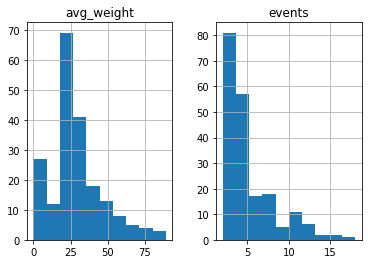

In [17]:
df.hist()

In [18]:
df.describe()

,avg_weight,events
count,200.000000,200.00000
mean,28.418150,5.05500
std,18.080832,3.13386
min,0.000000,2.00000
25%,19.782500,3.00000
50%,25.315000,4.00000
75%,36.125000,6.00000
max,89.170000,18.00000


## PYMI team

CTF write-up https://github.com/pymivn/ctf

https://ctftime.org/team/175619

In [19]:
rt = requests.get('https://ctftime.org/team/175619', 
                 headers=ff_header)
rt

<Response [200]>

In [20]:
dft = pd.read_html(rt.text)[0]
dft.head()

,Place,Place.1,Event,CTF points,Rating points
0,NaN,75,b01lers CTF,654.0,5.761
1,NaN,83,CrewCTF 2022,1212.0,1.304
2,NaN,146,DCTF 2022,400.0,1.456
3,NaN,67,Space Heroes CTF,2367.0,5.219
4,NaN,192,LINE CTF 2022,101.0,0.616


In [21]:
dft.drop(columns=['Place']).sort_values('Rating points', ascending=False)[:10]

,Place.1,Event,CTF points,Rating points
11,41,DefCamp CTF 21-22 Online,1208.0,11.179
6,59,1337UP LIVE CTF,2815.0,6.084
0,75,b01lers CTF,654.0,5.761
10,54,VU CYBERTHON 2022,174.0,5.323
3,67,Space Heroes CTF,2367.0,5.219
5,96,zer0pts CTF 2022,386.0,2.792
13,66,TetCTF 2022,300.0,1.462
2,146,DCTF 2022,400.0,1.456
1,83,CrewCTF 2022,1212.0,1.304
9,109,TSJ CTF 2022,110.0,0.987
